In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
# Install Ultralytics library
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 21.9 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image

# Import YOLOv8 from Ultralytics
import ultralytics
from ultralytics import YOLO

# Check the installation of Ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [4]:
# Define paths for the best performing model
best_path0='/content/drive/MyDrive/TSA_model/yolo30/best.pt'

In [5]:
# Load the best performing model for prediction
model2 = YOLO(best_path0)

In [51]:
# Define the path for the input video
video_path = '/content/drive/MyDrive/TSA_video/video2.mp4'



In [52]:
from IPython.display import display, HTML, Video

# Display the video using IPython.display.Video
video = Video(video_path, embed=True)
display(video)


In [53]:
import pandas as pd

#model2.predict returns a list of Results objects
results = model2.predict(source=video_path, stream=True, save=True)

# Create an empty list to store DataFrames for each result
dfs = []

# Loop through the detections and create a DataFrame for each result
for frame_number, result in enumerate(results, start=1):
    data = []
    for object_number, detection in enumerate(result.boxes.xyxy, start=1):
        x1, y1, x2, y2 = map(float, detection[0:4])
        data.append({
            "Frame": frame_number,
            "Object": object_number,
            "X1": x1,
            "Y1": y1,
            "X2": x2,
            "Y2": y2
        })

    # Create a DataFrame for the current result
    df = pd.DataFrame(data)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Display the final DataFrame
display(df)



video 1/1 (frame 1/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 62.9ms
video 1/1 (frame 2/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 62.8ms
video 1/1 (frame 3/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 62.8ms
video 1/1 (frame 4/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 37.5ms
video 1/1 (frame 5/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 37.2ms
video 1/1 (frame 6/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 37.2ms
video 1/1 (frame 7/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 35.1ms
video 1/1 (frame 8/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 33.3ms
video 1/1 (frame 9/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 33.4ms
video 1/1 (frame 10/181) /content/drive/MyDrive/TSA_video/video2.mp4: 640x384 1 other, 34.4ms
video 1/1 (frame 11/181) /content/drive/MyDrive/TSA_video/video2.mp4

,Frame,Object,X1,Y1,X2,Y2
0,1,1,239.095093,490.414581,264.719330,517.365356
1,2,1,236.758987,492.143738,263.927551,518.595093
2,3,1,236.427856,493.243195,263.843872,520.297607
3,4,1,235.813690,494.244324,262.967804,521.497375
4,5,1,236.133911,494.565399,263.594788,522.031738
...,...,...,...,...,...,...
129,177,1,241.859558,546.454834,281.095856,584.861694
130,178,1,243.900787,546.466003,281.781982,585.111328
131,179,1,242.932571,547.166199,281.179443,585.023071
132,180,1,242.529922,547.846252,280.490723,585.277405


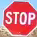

In [54]:
# Extract and display object images from the specified video using bounding box coordinates
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd

def extract_object_images(video_path, df):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Couldn't open video file.")
        return

    processed_objects = set()  # Set to keep track of processed object numbers

    for _, row in df.iterrows():
        frame_number = int(row["Frame"])
        object_number = int(row["Object"])

        # Skip if the object has already been processed
        if object_number in processed_objects:
            continue

        x1, y1, x2, y2 = row["X1"], row["Y1"], row["X2"], row["Y2"]

        # Set the frame number to the desired frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number - 1)

        # Read the frame
        ret, frame = cap.read()

        if not ret:
            print(f"Error: Couldn't read frame {frame_number}.")
            continue

        # Convert coordinates to integers
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Crop the region inside the specified rectangle
        object_image = frame[y1:y2, x1:x2]

        # Display the object image
        cv2_imshow(object_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # Add the processed object number to the set
        processed_objects.add(object_number)

    # Release the video capture object
    cap.release()


df
df = pd.DataFrame(data)
extract_object_images(video_path, df)


In [55]:
# Save object images to a specified output folder
import cv2
import os
import pandas as pd
from google.colab import drive

def save_object_images(video_path, df, output_folder):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Couldn't open video file.")
        return

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    for _, row in df.iterrows():
        frame_number = int(row["Frame"])
        object_number = int(row["Object"])

        x1, y1, x2, y2 = map(int, row[["X1", "Y1", "X2", "Y2"]])

        # Set the frame number to the desired frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number - 1)

        # Read the frame
        ret, frame = cap.read()

        if not ret:
            print(f"Error: Couldn't read frame {frame_number}.")
            continue

        # Crop the region inside the specified rectangle
        object_image = frame[y1:y2, x1:x2]

        # Convert to RGB format before saving
        object_image_rgb = cv2.cvtColor(object_image, cv2.COLOR_BGR2GRAY)

        # Save the object image to the output folder in RGB format
        filename = f"object_{object_number}_frame_{frame_number}.png"
        filepath = os.path.join(output_folder, filename)
        cv2.imwrite(filepath, object_image_rgb)

    # Release the video capture object
    cap.release()

df
output_folder = "/content/custom_test_dataset"
save_object_images(video_path, df, output_folder)


In [56]:
from keras.models import Sequential, load_model

# Load the best trained model from the saved file
best_CNN_model = load_model('/content/drive/MyDrive/TSA_model/cnn97.56/best_CNN_model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
!pip install gtts


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Image 1: /content/custom_test_dataset/object_1_frame_181.png
Predicted sign: Stop



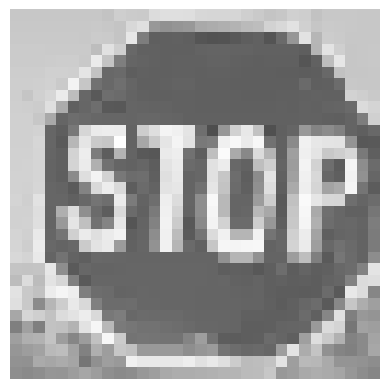

In [58]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
from gtts import gTTS
from IPython.display import Audio, display
from pandas.io.parsers import read_csv


# Load your trained CNN model
sign_names = read_csv("/content/drive/MyDrive/TSA_model/signname.csv").values[:, 1]

# Define the path to your test images
test_images_path = '/content/custom_test_dataset'

# Use tf.data to create a dataset of file paths
test_dataset = tf.data.Dataset.list_files(os.path.join(test_images_path, '*.png'))

# Function to load and preprocess an image
def preprocess_image(file_path):
    img_color = load_img(file_path, target_size=(32, 32))
    img = load_img(file_path, target_size=(32, 32), color_mode='grayscale')
    normalized_image = (img_to_array(img) - 32) / 32
    return normalized_image, img_color, file_path

# Preprocess all images
preprocessed_images = [preprocess_image(file_path.numpy().decode('utf-8')) for file_path in test_dataset]

# Predict on the test dataset
for i, (normalized_image, img_color, file_path) in enumerate(preprocessed_images, start=1):
    predictions = best_CNN_model.predict(tf.convert_to_tensor([normalized_image]))
    predicted_label = sign_names[np.argmax(predictions)]

    # Display information and prediction
    print(f"Image {i}: {file_path}")
    print(f"Predicted sign: {predicted_label}\n")

    # Convert text to speech and display as an audio widget in Colab
    message = f"Predicted sign: {predicted_label}."
    tts = gTTS(message)
    tts.save("output.mp3")
    display(Audio("output.mp3", autoplay=True))

    # Display the color image
    plt.imshow(img_color)
    plt.axis('off')
    plt.show()
